In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from geopy.geocoders import Nominatim

%matplotlib inline
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd))

HousePrice1 = pd.read_csv("HousePrice1.csv")

Current working directory: /Users/chereowang27/NYCDSA/Machine_Learning_I/Machine_Learning_Project/Ames_Housing_ML


In [51]:
HousePrice1.columns

Index(['Unnamed: 0', 'MapRefNo', 'Prop_Addr', 'Unnamed: 0.1', 'PID',
       'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotFrontage',
       'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'Garage

In [16]:
HousePrice1['ppsqft']= HousePrice1["SalePrice"]/HousePrice1['GrLivArea']
HousePrice1['mo_Yr_sold'] = HousePrice1.MoSold.astype(str) + '/' + HousePrice1.YrSold.astype(str)
HousePrice1['mo_Yr_sold'] = pd.to_datetime(HousePrice1['mo_Yr_sold'])
HousePrice1_gr = HousePrice1.groupby(['mo_Yr_sold','Neighborhood'])[['SalePrice']].median()\
         .reset_index()
HousePrice1_gr

,mo_Yr_sold,Neighborhood,SalePrice
0,2006-01-01,CollgCr,232500.0
1,2006-01-01,Gilbert,172400.0
2,2006-01-01,NAmes,138000.0
3,2006-01-01,NWAmes,181000.0
4,2006-01-01,SWISU,80000.0
...,...,...,...
891,2010-07-01,Crawfor,257500.0
892,2010-07-01,Edwards,80000.0
893,2010-07-01,IDOTRR,55000.0
894,2010-07-01,NAmes,161000.0


<Figure size 144000x7200 with 0 Axes>

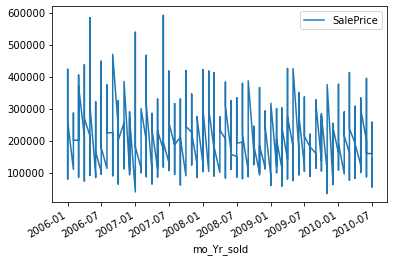

In [31]:
from matplotlib.pyplot import figure
figure(figsize=(2000, 100))
g = HousePrice1_gr.plot(x = "mo_Yr_sold", y = 'SalePrice')
plt.show()

In [54]:
HousePrice1._get_numeric_data().columns

Index(['Unnamed: 0', 'MapRefNo', 'Unnamed: 0.1', 'PID', 'GrLivArea',
       'SalePrice', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'ppsqft'],
      dtype='object')

In [75]:
log_p = np.log10(HousePrice1['SalePrice'])
num_features = HousePrice1._get_numeric_data()  \
 .drop(['Unnamed: 0', 'MapRefNo', 'Unnamed: 0.1',\
       'PID','MSSubClass','MoSold', 'YrSold', 'ppsqft','SalePrice'], axis = 1)
X = num_features
y = HousePrice1['SalePrice']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2624 entries, 0 to 2623
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GrLivArea      2624 non-null   int64  
 1   LotFrontage    2623 non-null   float64
 2   LotArea        2624 non-null   int64  
 3   OverallQual    2624 non-null   int64  
 4   OverallCond    2624 non-null   int64  
 5   YearBuilt      2624 non-null   int64  
 6   YearRemodAdd   2624 non-null   int64  
 7   MasVnrArea     2624 non-null   float64
 8   BsmtFinSF1     2624 non-null   float64
 9   BsmtFinSF2     2624 non-null   float64
 10  BsmtUnfSF      2624 non-null   float64
 11  TotalBsmtSF    2624 non-null   float64
 12  1stFlrSF       2624 non-null   int64  
 13  2ndFlrSF       2624 non-null   int64  
 14  LowQualFinSF   2624 non-null   int64  
 15  BsmtFullBath   2624 non-null   float64
 16  BsmtHalfBath   2624 non-null   float64
 17  FullBath       2624 non-null   int64  
 18  HalfBath

In [73]:
# check the VIF of numeric features
from sklearn import linear_model, datasets
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(num_features, y, test_size = 0.3, random_state = 42)
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
ols = LinearRegression()
ols.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

TypeError: strptime() argument 1 must be str, not int